In [55]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from numpy.polynomial.polynomial import polyfit
from ipywidgets import interact
import plotly.express as px
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [56]:
data = pd.read_csv('weatherAUS.csv')

In [57]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [59]:
data.shape

(145460, 23)

In [60]:
data['Location'].value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

In [61]:
data['Date'] = pd.to_datetime(data['Date'])

In [62]:
data = pd.DataFrame(data)

data['Date'] = pd.to_datetime(data['Date'])

def plot_city_value(city, value):
    city_data = data[data['Location'] == city]
    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=city_data, x='Date', y=value)
    plt.title(f'{value} in {city}')
    plt.xlabel('Date')
    plt.ylabel(value)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

cities = data['Location'].unique()
values = ['MaxTemp', 'MinTemp', 'WindGustSpeed', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

interact(plot_city_value, city=cities, value=values)
plt.show()

interactive(children=(Dropdown(description='city', options=('Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour'…

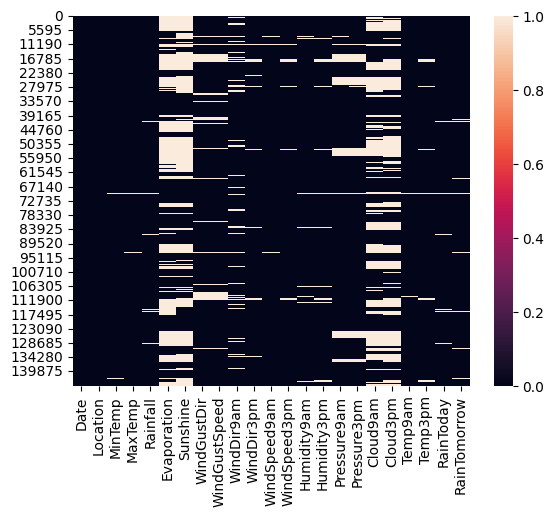

In [63]:
sns.heatmap(data.isnull())
plt.show()

In [64]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

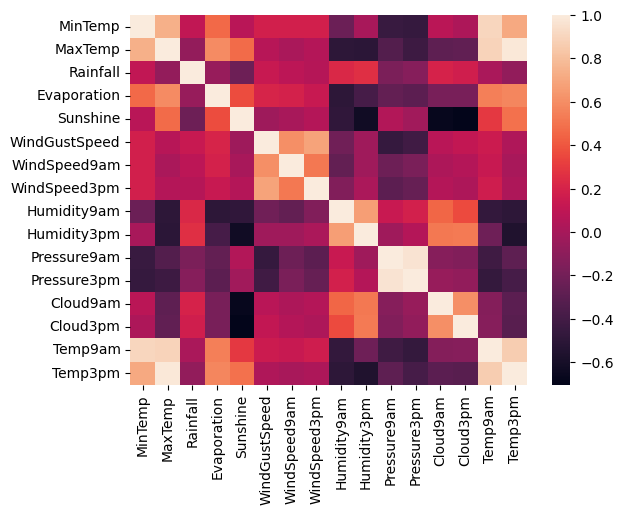

In [65]:
sns.heatmap(data.corr(numeric_only=True))
plt.show()

In [66]:
data = data.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm','Date', 'Location'], axis=1)   

**Handling missing values**

In [67]:
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for column in numerical_cols:
    data[column] = data[column].fillna(data[column].mean())

In [68]:
categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for column in categorical_cols:
    data[column] = data[column].fillna(method='ffill')

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_29821/1001430385.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[column] = data[column].fillna(method='ffill')


In [69]:
for column in categorical_cols:
    if column not in data.columns:
        print(f"Column {column} does not exist in the DataFrame.")

In [70]:
categorical_data = pd.get_dummies(data, columns=categorical_cols, drop_first=True, dtype=float)
data = pd.concat([data, categorical_data],axis=1)

In [71]:
data.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm'],axis=1, inplace=True)

In [72]:
duplicate_columns = data.columns[data.columns.duplicated()].tolist()
print(f"Duplicate columns: {duplicate_columns}")

data = data.loc[:, ~data.columns.duplicated()]

Duplicate columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [73]:
data = data.dropna(subset=['RainToday', 'RainTomorrow'])

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 59 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MinTemp          140787 non-null  float64
 1   MaxTemp          140787 non-null  float64
 2   Rainfall         140787 non-null  float64
 3   WindGustSpeed    140787 non-null  float64
 4   WindSpeed9am     140787 non-null  float64
 5   WindSpeed3pm     140787 non-null  float64
 6   Humidity9am      140787 non-null  float64
 7   Humidity3pm      140787 non-null  float64
 8   Pressure9am      140787 non-null  float64
 9   Pressure3pm      140787 non-null  float64
 10  Temp9am          140787 non-null  float64
 11  Temp3pm          140787 non-null  float64
 12  RainToday        140787 non-null  object 
 13  RainTomorrow     140787 non-null  object 
 14  WindGustDir_ENE  140787 non-null  float64
 15  WindGustDir_ESE  140787 non-null  float64
 16  WindGustDir_N    140787 non-null  float64
 

In [75]:
data['RainToday'] = data['RainToday'].map({'No': 0, 'Yes': 1})
data['RainTomorrow'] = data['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [76]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
data.isnull().sum()

MinTemp            0
MaxTemp            0
Rainfall           0
WindGustSpeed      0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
WindGustDir_ENE    0
WindGustDir_ESE    0
WindGustDir_N      0
WindGustDir_NE     0
WindGustDir_NNE    0
WindGustDir_NNW    0
WindGustDir_NW     0
WindGustDir_S      0
WindGustDir_SE     0
WindGustDir_SSE    0
WindGustDir_SSW    0
WindGustDir_SW     0
WindGustDir_W      0
WindGustDir_WNW    0
WindGustDir_WSW    0
WindDir9am_ENE     0
WindDir9am_ESE     0
WindDir9am_N       0
WindDir9am_NE      0
WindDir9am_NNE     0
WindDir9am_NNW     0
WindDir9am_NW      0
WindDir9am_S       0
WindDir9am_SE      0
WindDir9am_SSE     0
WindDir9am_SSW     0
WindDir9am_SW      0
WindDir9am_W       0
WindDir9am_WNW     0
WindDir9am_WSW     0
WindDir3pm_ENE     0
WindDir3pm_ESE     0
WindDir3pm_N       0
WindDir3pm_NE

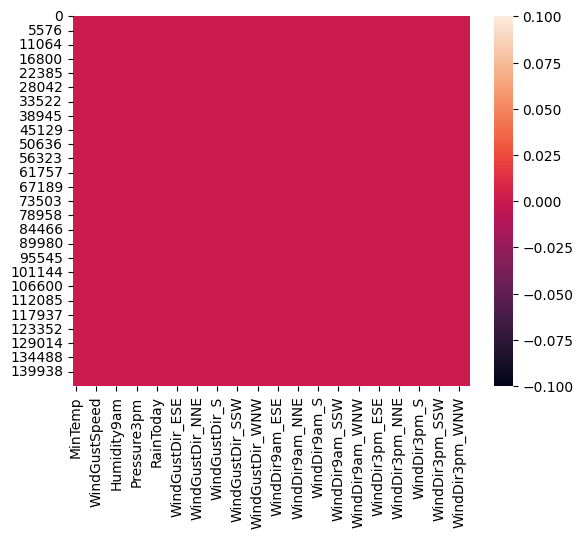

In [78]:
sns.heatmap(data.isnull())
plt.show()

**Gradient Boosting Classifier**

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [80]:
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE',
       'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S',
       'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW',
       'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_ENE',
       'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 

In [81]:
from sklearn.model_selection import GridSearchCV

#param_grid = {
    #'n_estimators': [100, 200],
    #'learning_rate': [0.01, 0.1],
    #'max_depth': [3, 5],
    #'subsample': [0.8, 1.0]
#}

#gbm = GradientBoostingClassifier(random_state=42)

#grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
#grid_search.fit(X_train, y_train)

#print("Best parameters found: ", grid_search.best_params_)

In [82]:
X = data.drop(columns=['RainTomorrow'])
y = data['RainTomorrow']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)


model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8)
model.fit(X_train, y_train)


pred_tree = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_tree))

print("\nClassification Report:")
print(classification_report(y_test, pred_tree))


train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Accuracy on training set: {train_accuracy:.3f}")
print(f"Accuracy on test set: {test_accuracy:.3f}")

Confusion Matrix:
[[20791  1118]
 [ 3035  3214]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     21909
           1       0.74      0.51      0.61      6249

    accuracy                           0.85     28158
   macro avg       0.81      0.73      0.76     28158
weighted avg       0.84      0.85      0.84     28158

Accuracy on training set: 0.869
Accuracy on test set: 0.853


**Logistic Regression**

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#param_grid = {
    #'C': [0.01, 0.1, 1, 10, 100],  
    #'solver': ['newton-cg', 'lbfgs', 'liblinear'] 
#}

#log_reg = LogisticRegression(random_state=42, max_iter=1000)

#grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

#grid_search.fit(X_train_scaled, y_train)

#best_params = grid_search.best_params_
#print("Best parameters found: ", best_params)

In [85]:
logr = LogisticRegression(solver='lbfgs', random_state=42, max_iter=1000)
logr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [86]:
predlog = logr.predict(X_test_scaled)
print("Confusion Matrix:")
print(confusion_matrix(y_test, predlog))

print("\nClassification Report:")
print(classification_report(y_test, predlog))

train_accuracy = logr.score(X_train_scaled, y_train)
test_accuracy = logr.score(X_test_scaled, y_test)
print(f"Accuracy on training set: {train_accuracy:.3f}")
print(f"Accuracy on test set: {test_accuracy:.3f}")

Confusion Matrix:
[[20754  1155]
 [ 3328  2921]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     21909
           1       0.72      0.47      0.57      6249

    accuracy                           0.84     28158
   macro avg       0.79      0.71      0.73     28158
weighted avg       0.83      0.84      0.83     28158

Accuracy on training set: 0.843
Accuracy on test set: 0.841


**Neural Networks**

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from sklearn.neural_network import MLPClassifier

In [88]:
#param_grid = {
    #'hidden_layer_sizes': [(50,), (100,)],
    #'activation': ['relu'],
    #'solver': ['adam'],
    #'alpha': [0.0001, 0.001],
#}

#mlp = MLPClassifier(max_iter=1000, random_state=42)

#grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

#grid_search.fit(X_train_scaled, y_train)

#best_params = grid_search.best_params_
#print("Best parameters found: ", best_params)

In [89]:
mlp = MLPClassifier(activation='relu', alpha=0.001, hidden_layer_sizes=(50,), solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

pred_mlp = mlp.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_mlp))

print("\nClassification Report:")
print(classification_report(y_test, pred_mlp))

train_accuracy = mlp.score(X_train_scaled, y_train)
test_accuracy = mlp.score(X_test_scaled, y_test)
print(f"Accuracy on training set: {train_accuracy:.3f}")
print(f"Accuracy on test set: {test_accuracy:.3f}")

Confusion Matrix:
[[20595  1314]
 [ 2965  3284]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     21909
           1       0.71      0.53      0.61      6249

    accuracy                           0.85     28158
   macro avg       0.79      0.73      0.76     28158
weighted avg       0.84      0.85      0.84     28158

Accuracy on training set: 0.866
Accuracy on test set: 0.848


In [90]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

/opt/anaconda3/envs/DataScience/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
model.fit(
    x=X_train_scaled, 
    y=y_train, 
    epochs=50, 
    batch_size=256, 
    validation_data=(X_test_scaled, y_test),
)

Epoch 1/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step,loss: 0.4706,val_loss: 0.3709
Epoch 2/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step,loss: 0.3796,val_loss: 0.3638
Epoch 3/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step,loss: 0.3671,val_loss: 0.3587
Epoch 4/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step,loss: 0.3634,val_loss: 0.3567
Epoch 5/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step,loss: 0.3597,val_loss: 0.3546
Epoch 6/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step,loss: 0.3573,val_loss: 0.3541
Epoch 7/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step,loss: 0.3547,val_loss: 0.3538
Epoch 8/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step,loss: 0.3503,val_loss: 0.3505
Epoch 9/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step,loss: 0.3501,val_loss: 0.3519
Epoch 10/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step,loss: 0.3525,val_loss: 0.3499
Epoch 11/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step,loss: 0.3451,val_loss: 0.3514
Epoch 12/50
440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step,loss: 0.3485,val_loss: 0.3477
Epoch 13/50
4

<Axes: >

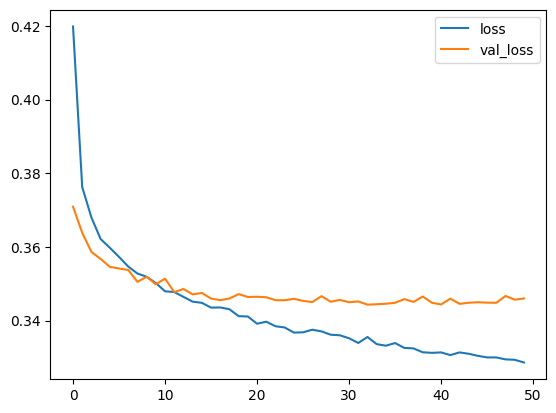

In [92]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [93]:
predictions = (model.predict(X_test_scaled) > 0.5).astype("int32")

880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [94]:
print(classification_report (y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     21909
           1       0.76      0.47      0.58      6249

    accuracy                           0.85     28158
   macro avg       0.81      0.72      0.75     28158
weighted avg       0.84      0.85      0.84     28158

